<a href="https://colab.research.google.com/github/nshzk8975/fastai/blob/master/Lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%load_ext autoreload 
%autoreload 2
%matplotlib inline

In [0]:
from fastai import*
from fastai.vision import *

In [0]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [0]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

In [0]:
path = untar_data(URLs.PETS);path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [0]:
path_img 

PosixPath('/root/.fastai/data/oxford-iiit-pet/images')

In [0]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_57.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_217.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Siamese_108.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bengal_39.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_71.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)

In [0]:
data

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pomeranian,Maine_Coon,Siamese,yorkshire_terrier,great_pyrenees
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Persian,english_cocker_spaniel,american_bulldog,wheaten_terrier,shiba_inu
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

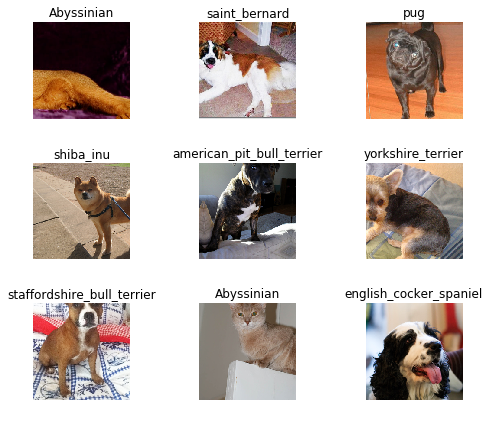

In [0]:
data.show_batch(rows=3, figsize=(7, 6))

In [0]:
imagenet_stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [0]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pomeranian,Maine_Coon,Siamese,yorkshire_terrier,great_pyrenees
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Persian,english_cocker_spaniel,american_bulldog,wheaten_terrier,shiba_inu
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

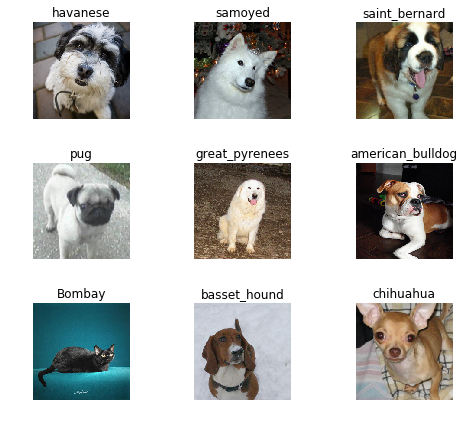

In [0]:
data.show_batch(rows=3, figsize=(7, 6))

In [0]:
print(data.classes)
len(data.classes), data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.411047,0.329165,0.088633,01:58
1,0.551322,0.254482,0.081191,01:58
2,0.352364,0.210865,0.062246,01:57
3,0.268299,0.216385,0.064953,01:58


In [0]:
learn.save('stage-1')

# **Results**

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

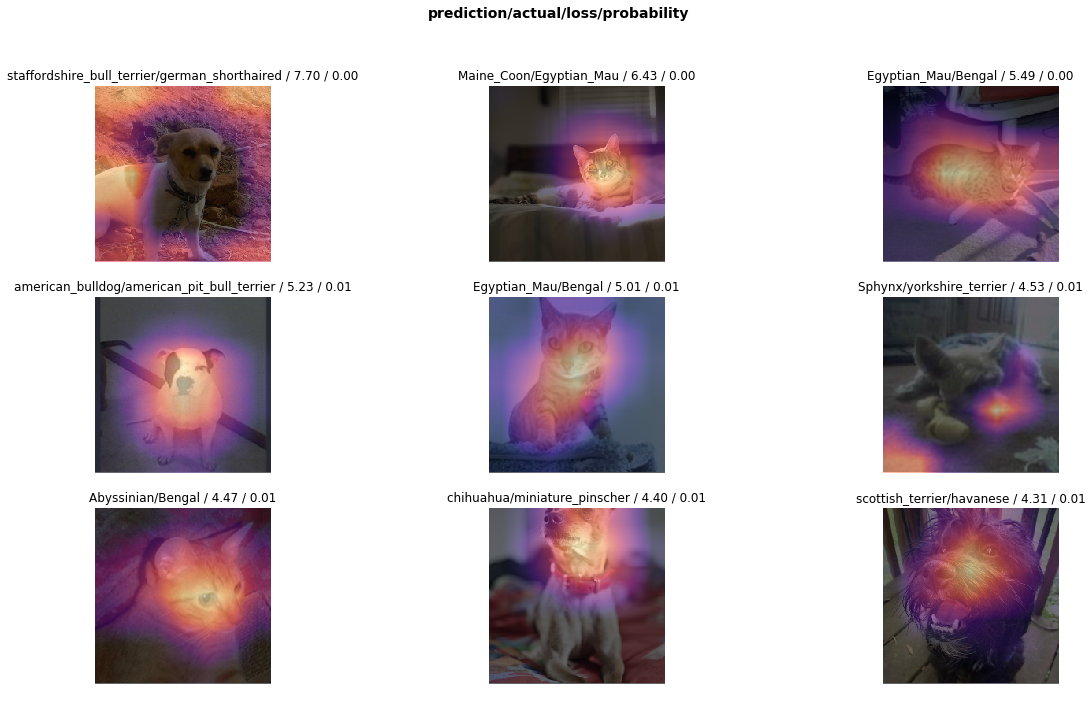

In [0]:
interp.plot_top_losses(9, figsize=(20,11), heatmap=True)

In [0]:
doc(interp.plot_top_losses)

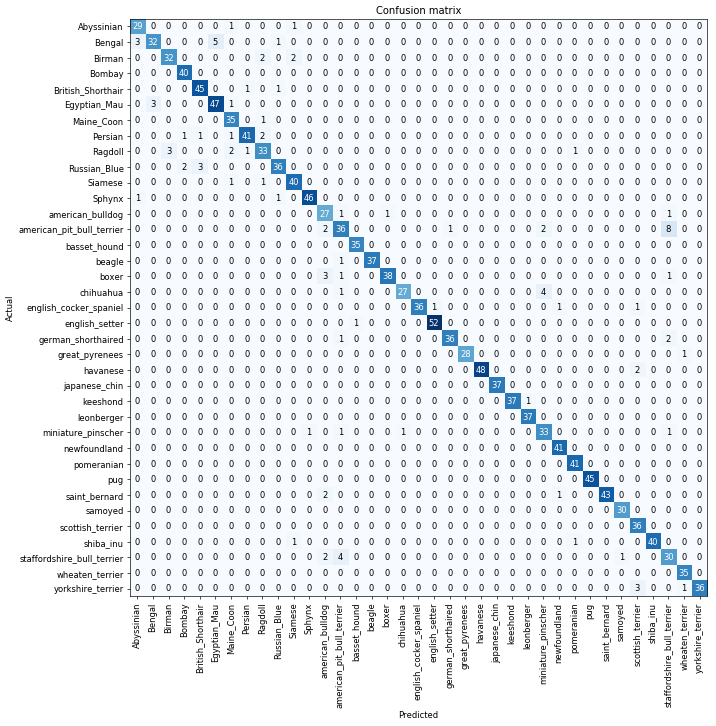

In [0]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [0]:
doc(interp.plot_confusion_matrix)

In [0]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 8),
 ('Bengal', 'Egyptian_Mau', 5),
 ('chihuahua', 'miniature_pinscher', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Bengal', 'Abyssinian', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Ragdoll', 'Birman', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('boxer', 'american_bulldog', 3),
 ('yorkshire_terrier', 'scottish_terrier', 3),
 ('Birman', 'Ragdoll', 2),
 ('Birman', 'Siamese', 2),
 ('Persian', 'Ragdoll', 2),
 ('Ragdoll', 'Maine_Coon', 2),
 ('Russian_Blue', 'Bombay', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('american_pit_bull_terrier', 'miniature_pinscher', 2),
 ('german_shorthaired', 'staffordshire_bull_terrier', 2),
 ('havanese', 'scottish_terrier', 2),
 ('saint_bernard', 'american_bulldog', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

In [0]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.494818,0.295383,0.088633,02:12


In [0]:
learn.load('stage-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


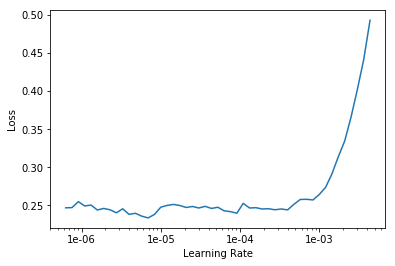

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.229052,0.201634,0.065629,02:11
1,0.208256,0.192451,0.062923,02:14


# **ResNet50**

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=320, bs=20)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: CategoryList
Maine_Coon,Siamese,Bengal,newfoundland,great_pyrenees
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: CategoryList
Abyssinian,yorkshire_terrier,Birman,Maine_Coon,Bombay
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

In [0]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [0]:
learn.fit_one_cycle(8, max_lr=slice(1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.039128,0.390162,0.092016,04:19
1,0.502538,0.242376,0.073748,04:08
2,0.383309,0.197948,0.073072,04:09
3,0.290500,0.181228,0.060893,04:08
4,0.236710,0.149768,0.054127,04:09
5,0.175547,0.138614,0.052774,04:04
6,0.139591,0.134868,0.050068,04:05
7,0.138574,0.130825,0.052097,04:07


In [0]:
learn.save('stage-1-50')

In [0]:
learn.unfreeze()
learn.fit_one_cycle(1, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.134205,0.132508,0.048714,05:07


In [0]:
learn.save('stage-1-50')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)

[('staffordshire_bull_terrier', 'american_pit_bull_terrier', 6),
 ('Egyptian_Mau', 'Bengal', 5),
 ('Ragdoll', 'Birman', 4),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('english_cocker_spaniel', 'english_setter', 3),
 ('miniature_pinscher', 'chihuahua', 3),
 ('Bengal', 'Egyptian_Mau', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Russian_Blue', 'Abyssinian', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('beagle', 'basset_hound', 2),
 ('boxer', 'american_bulldog', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

# **Homework**

## *PLANET_sample*

In [3]:
path = untar_data(URLs.PLANET_SAMPLE);path

PosixPath('/root/.fastai/data/planet_sample')

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/planet_sample/labels.csv'),
 PosixPath('/root/.fastai/data/planet_sample/train'),
 PosixPath('/root/.fastai/data/planet_sample/models')]

In [0]:
(path/'train').ls()

In [0]:
df = pd.read_csv(path/'labels.csv')
df['image_name'] = 'train/' + df['image_name'] + '.jpg'
df.head()

,image_name,tags
0,train/train_21983.jpg,partly_cloudy primary
1,train/train_9516.jpg,clear cultivation primary water
2,train/train_12664.jpg,haze primary
3,train/train_36960.jpg,clear primary
4,train/train_5302.jpg,haze primary road


In [6]:
data = ImageDataBunch.from_csv(path, folder='train', suffix='.jpg', ds_tfms=get_transforms(), size=224)

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:525: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
agriculture partly_cloudy primary road slash_burn, agriculture cultivation haze primary water, blooming clear cultivation primary, agriculture clear cultivation primary road water, habitation partly_cloudy primary water...
  if getattr(ds, 'warn', False): warn(ds.warn)


In [7]:
data

ImageDataBunch;

Train: LabelList (800 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
partly_cloudy primary,clear primary,haze primary road,clear primary,partly_cloudy primary
Path: /root/.fastai/data/planet_sample;

Valid: LabelList (190 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
clear primary road,clear primary water,agriculture clear cultivation primary,clear primary,agriculture partly_cloudy primary
Path: /root/.fastai/data/planet_sample;

Test: None

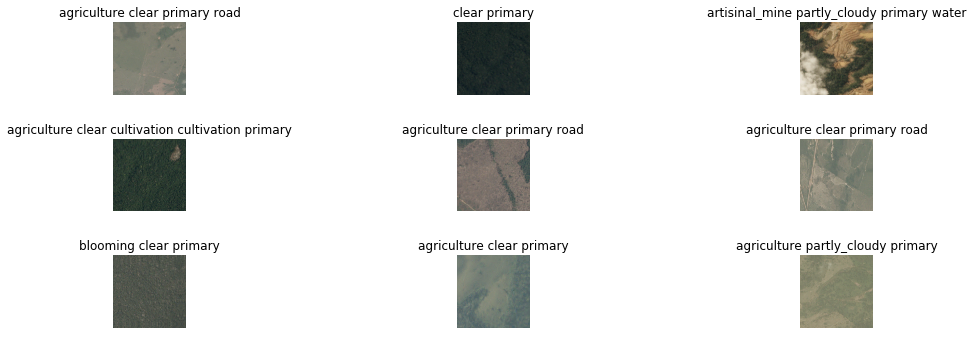

In [8]:
data.show_batch(rows=3, figsize=(15,5))

In [9]:
len(data.classes), data.c

(93, 93)

In [10]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (800 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
partly_cloudy primary,clear primary,haze primary road,clear primary,partly_cloudy primary
Path: /root/.fastai/data/planet_sample;

Valid: LabelList (190 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
clear primary road,clear primary water,agriculture clear cultivation primary,clear primary,agriculture partly_cloudy primary
Path: /root/.fastai/data/planet_sample;

Test: None

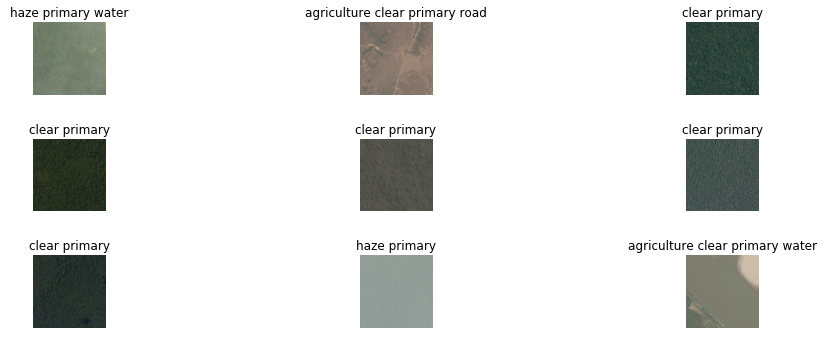

In [11]:
data.show_batch(rows=3, figsize=(15,5))

## Training(ResNet34)

In [12]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 85803478.70it/s]


In [13]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,4.467386,2.512595,0.447368,00:12
1,3.490334,1.902491,0.405263,00:10
2,3.031068,1.782132,0.378947,00:10


In [0]:
learn.save('stage-2')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

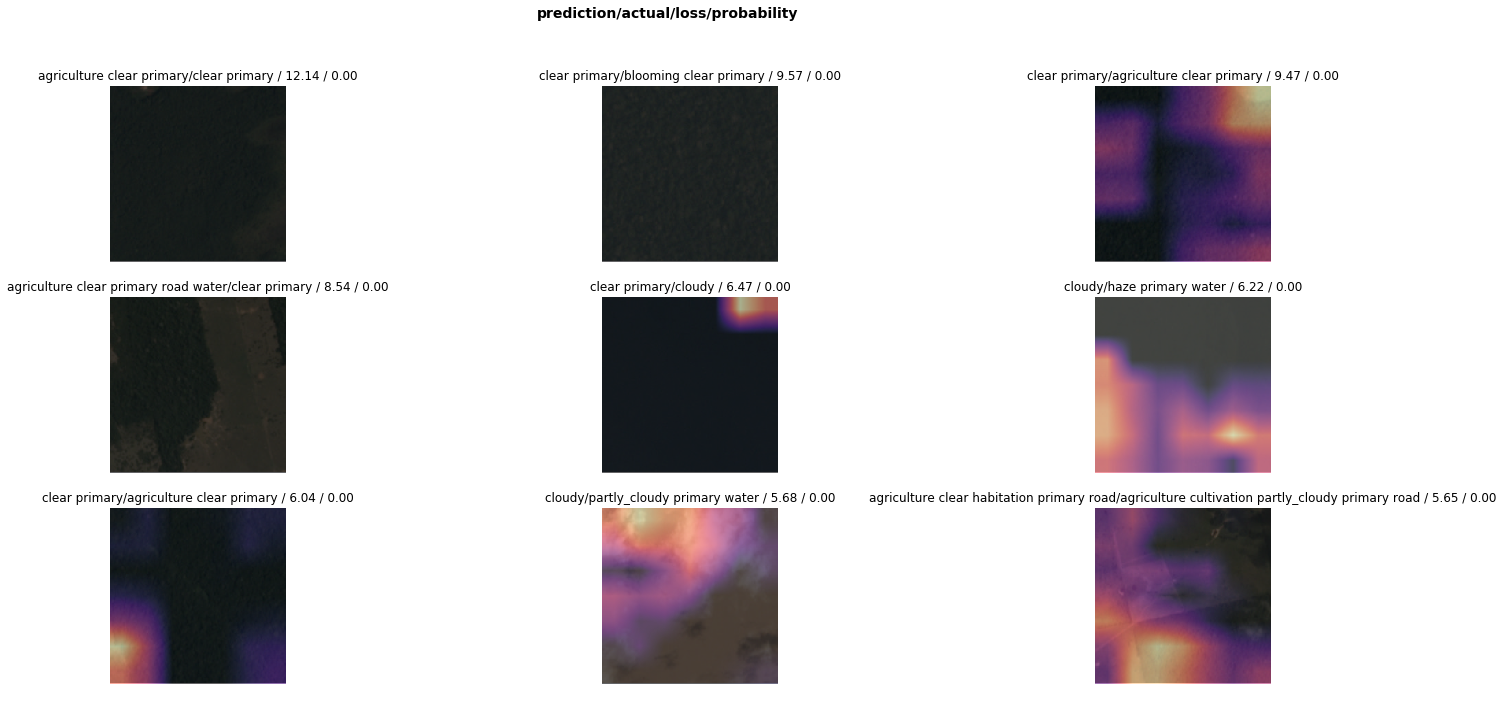

In [16]:
interp.plot_top_losses(9, figsize=(25,11), heatmap=True)

In [17]:
interp.most_confused(min_val=2)

[('agriculture clear primary', 'agriculture clear primary road', 4),
 ('agriculture clear primary', 'clear primary', 4),
 ('agriculture partly_cloudy primary', 'partly_cloudy primary', 3),
 ('cloudy', 'partly_cloudy primary', 3),
 ('agriculture clear cultivation primary',
  'agriculture clear habitation primary road',
  2),
 ('agriculture clear cultivation primary road',
  'agriculture clear primary road',
  2),
 ('agriculture clear habitation primary road', 'agriculture clear primary', 2),
 ('agriculture clear primary', 'partly_cloudy primary', 2),
 ('agriculture clear primary road water', 'agriculture clear primary road', 2),
 ('agriculture habitation partly_cloudy primary road',
  'agriculture clear primary road',
  2),
 ('partly_cloudy primary water', 'cloudy', 2),
 ('partly_cloudy primary water', 'partly_cloudy primary', 2)]

In [18]:
learn.unfreeze()
learn.fit_one_cycle(1, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,2.295728,1.770998,0.373684,00:10


## Training(ResNet50)

In [20]:
data = ImageDataBunch.from_csv(path, folder='train', suffix='.jpg', ds_tfms=get_transforms(), size=224, bs=112)

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:525: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
blow_down clear primary road, clear primary slash_burn water, clear conventional_mine primary road, clear habitation primary road, agriculture cultivation cultivation partly_cloudy primary water...
  if getattr(ds, 'warn', False): warn(ds.warn)


In [21]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 93480512.78it/s]


In [23]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.741165,1.951913,0.449198,00:16
1,1.667035,1.675617,0.422460,00:16
2,1.571430,1.548284,0.374332,00:16
3,1.466627,1.467595,0.352941,00:16
4,1.377356,1.440841,0.336898,00:16
5,1.313273,1.437841,0.342246,00:16


## *MNIST*

In [0]:
path = untar_data(URLs.MNIST_SAMPLE);path

PosixPath('/root/.fastai/data/mnist_sample')

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/mnist_sample/labels.csv'),
 PosixPath('/root/.fastai/data/mnist_sample/valid'),
 PosixPath('/root/.fastai/data/mnist_sample/train')]

In [0]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/mnist_sample/train/3'),
 PosixPath('/root/.fastai/data/mnist_sample/train/7')]

In [0]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

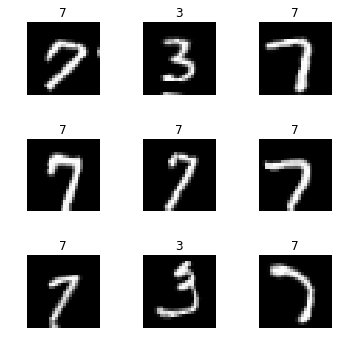

In [0]:
data.normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(5,5))

## Training(ResNet34)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.217355,0.081924,0.026006,00:27
1,0.118658,0.061188,0.023062,00:27
2,0.082948,0.040358,0.011776,00:27


In [0]:
learn.save('stage-3')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

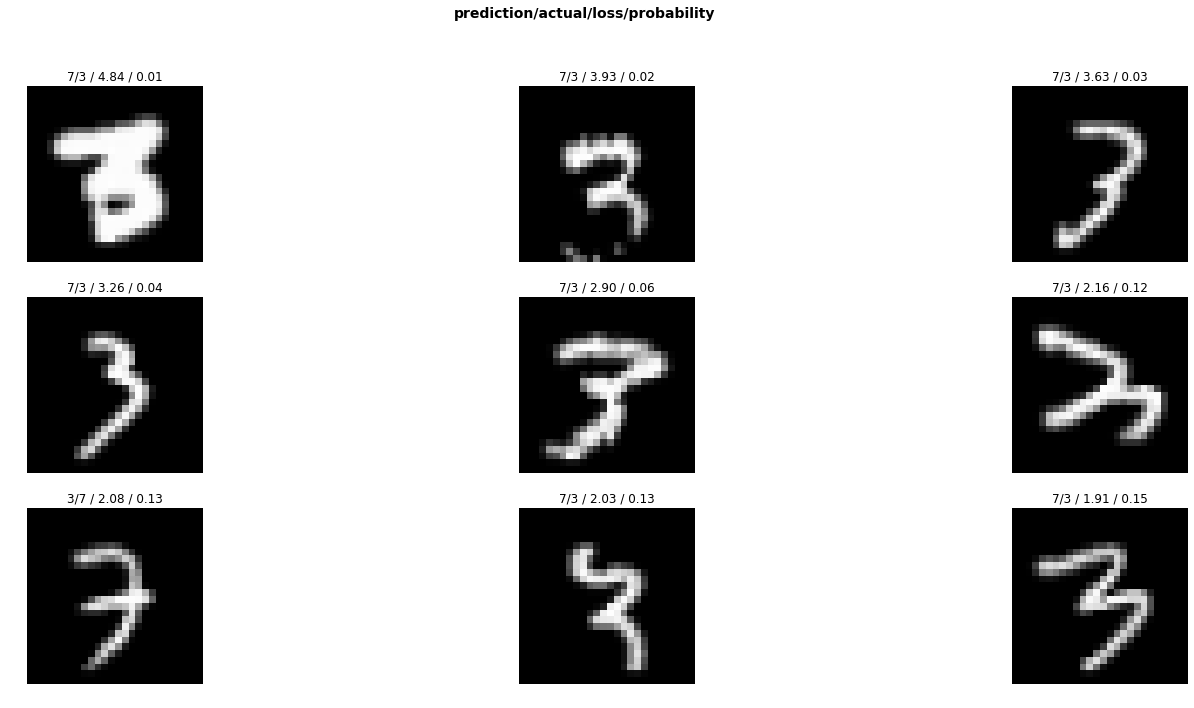

In [0]:
interp.plot_top_losses(9, figsize=(25,11))

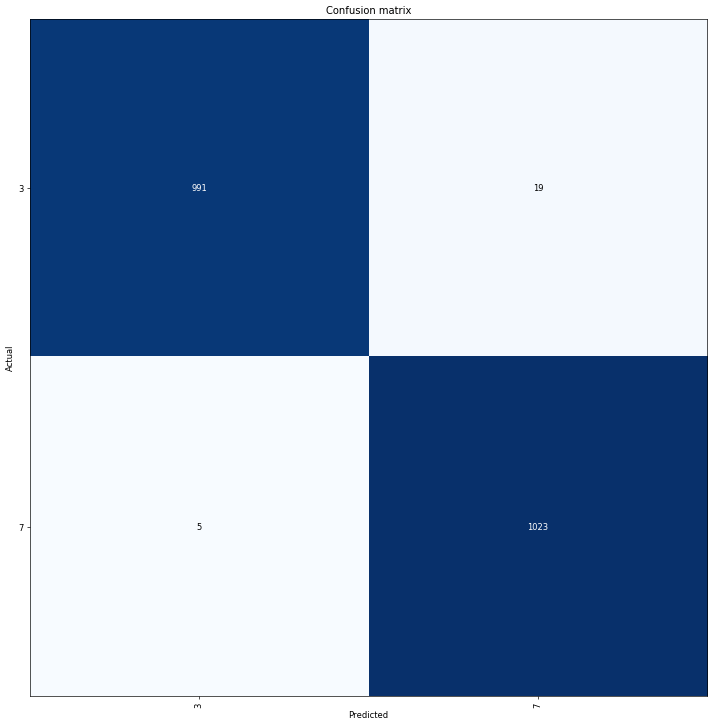

In [0]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)